<a href="https://colab.research.google.com/github/Henriquerezer/Machine_Learning/blob/main/7%20days%20of%20code%20ML/DIA_2_pr%C3%A9_processamento_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Pré-Processamento dos dados

Preparando nossos dados para o modelo de Machine Learning

⬇️ Importando nossos dados e bibliotecas básicas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/Machine_Learning/main/7%20days%20of%20code%20ML/dataset.csv')
data= data.drop('Unnamed: 0', axis = 1)
data.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


❌ Excluindo dados NULOS e DUPLICADOS

In [3]:
data.dropna() #remove todos os dados nulos 
data = data.drop_duplicates() #remove todos os itens duplicados 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113550 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113550 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113550 non-null  int64  
 5   duration_ms       113550 non-null  int64  
 6   explicit          113550 non-null  bool   
 7   danceability      113550 non-null  float64
 8   energy            113550 non-null  float64
 9   key               113550 non-null  int64  
 10  loudness          113550 non-null  float64
 11  mode              113550 non-null  int64  
 12  speechiness       113550 non-null  float64
 13  acousticness      113550 non-null  float64
 14  instrumentalness  113550 non-null  float64
 15  liveness          113550 non-null  float64
 16  valence           11

🔎 Entendendo a variavel alvo, como vou transformar ela para um valor categórico, vou pegar score acima de 65 e considerar "POPULAR", caso contrário terei poucos valores nessa classe

(array([22458.,  9279., 18354., 14910., 19205., 14532.,  9344.,  4269.,
         1101.,    98.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

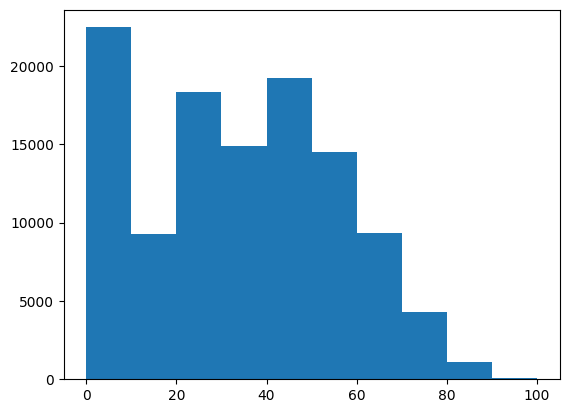

In [4]:
plt.hist(x=data['popularity'])

Temos algumas musicas com uma duração muito longa, o que atrapalharia o modelo 

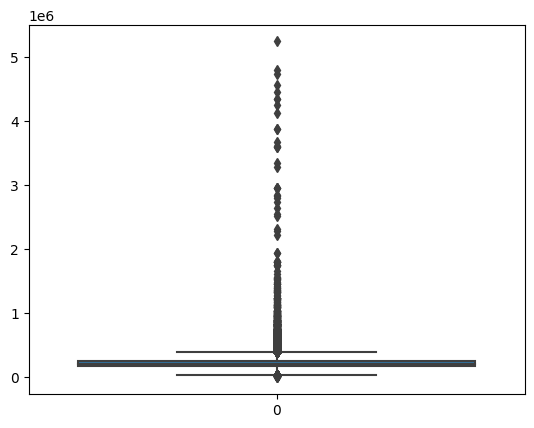

In [5]:
sns.boxplot(data['duration_ms']);

❌ Optei por excluir os OUTLIERS (muúsicas com duração muito acima da média)

In [6]:
data.drop(data[data['duration_ms'] >= 450000].index, inplace = True)

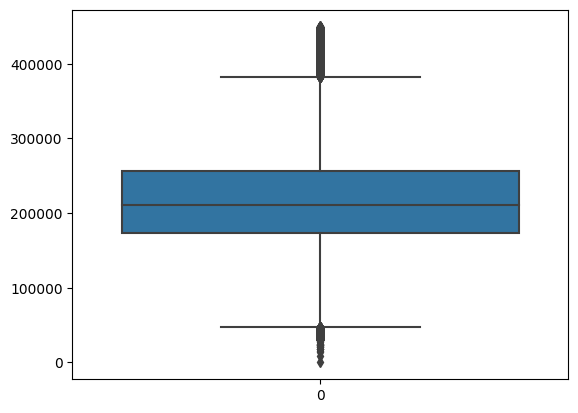

In [7]:
sns.boxplot(data['duration_ms']);

In [9]:
condicoes = [data['popularity'] >= 65, data['popularity'] < 65]
valores = [1, 0]
data['popularity'] = np.select(condicoes, valores)
data['popularity'] = data['popularity'].astype(int)

In [14]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,1,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [10]:
# Somente colunas quantitativas e que são importantes para o modelo

df_quantitative = data
cols_to_drop = []
for column in data:
    if data[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = data.drop(columns=cols_to_drop)

print(f"Tamanho do dataset que vamos trabalhar: {df_quantitative.shape}")

Tamanho do dataset que vamos trabalhar: (110880, 15)


In [11]:
df_quantitative = df_quantitative.drop(columns=['explicit'])
df_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110880 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        110880 non-null  int64  
 1   duration_ms       110880 non-null  int64  
 2   danceability      110880 non-null  float64
 3   energy            110880 non-null  float64
 4   key               110880 non-null  int64  
 5   loudness          110880 non-null  float64
 6   mode              110880 non-null  int64  
 7   speechiness       110880 non-null  float64
 8   acousticness      110880 non-null  float64
 9   instrumentalness  110880 non-null  float64
 10  liveness          110880 non-null  float64
 11  valence           110880 non-null  float64
 12  tempo             110880 non-null  float64
 13  time_signature    110880 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 16.7 MB


In [12]:
# Normalizando os dados, deixando na mesma escala
df_quantitative_nm=(df_quantitative-df_quantitative.min())/(df_quantitative.max()-df_quantitative.min())


In [13]:
df_quantitative_nm.head(5)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1.0,0.512666,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8
1,0.0,0.332515,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8
2,0.0,0.468571,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8
3,1.0,0.448806,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6
4,1.0,0.441960,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8
